In [1]:
import pandas as pd
from scipy.stats import chisquare
from scipy.stats import trim_mean
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv("train.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [3]:
def trim(x):
    return trim_mean(x,proportiontocut=0.1)

In [4]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [5]:
df["season"].unique()


array([1, 2, 3, 4])

In [6]:
a=["spring","summer","fall","winter"]
"""
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
"""
df["season"]=df["season"].apply(lambda n:a[n-1])
#df=pd.get_dummies(df,columns=["season"],drop_first=True)

In [7]:
df["datetime"]=pd.to_datetime(df["datetime"])
df["Month"]=df["datetime"].dt.month
df["Year"]=df["datetime"].dt.year
df.drop(["datetime"],axis=1,inplace=True)

In [8]:
correlation=df.select_dtypes(exclude=["object"]).corr()
columns=df.columns
i=1
l=len(columns)
category_columns=["Month","Year","weather","holiday","workingday","season"]
for col in columns:
    j=i
    if col in category_columns:
        i+=1
        continue
        
    while j<l:
        col1=columns[j]
        if col1 in category_columns:
            j+=1
            continue
        if abs(correlation[col][col1])>0.1:
            print(col,col1,correlation[col][col1])
        j+=1

    i+=1

    

temp atemp 0.9849481104817075
temp casual 0.46709706412013263
temp registered 0.31857128033739074
temp count 0.3944536449672518
atemp casual 0.46206653642600143
atemp registered 0.3146353862742616
atemp count 0.38978443662697554
humidity windspeed -0.3186069915712832
humidity casual -0.34818689928736407
humidity registered -0.26545786846975766
humidity count -0.31737147887659584
windspeed count 0.10136947021033216
casual registered 0.49724968508700884
casual count 0.6904135653286754
registered count 0.9709481058098266


In [9]:
#Among these correlations , the most significant ones are 
#temperature and apparent temperature have a direct correlation with number of customers renting bike
#humidity has a negative relation with number of customers renting bike
#higher windspeed has led to more number of customers renting a bike



Text(0, 0.5, 'count')

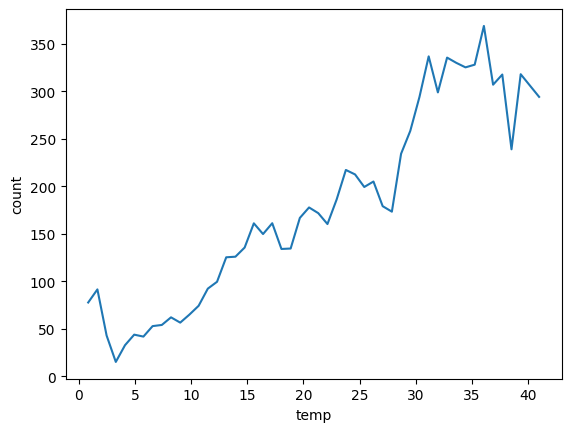

In [10]:
df_sorted=df.groupby("temp")["count"].apply(trim).reset_index()

plt.plot(df_sorted["temp"],df_sorted["count"])
plt.xlabel("temp")
plt.ylabel("count")

Text(0, 0.5, 'count')

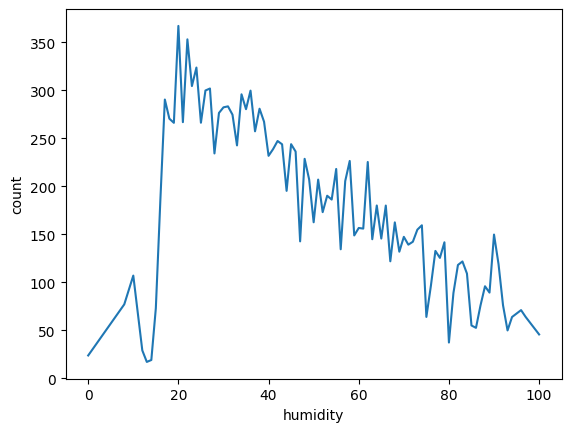

In [11]:
df_sorted=df.groupby("humidity")["count"].apply(trim).reset_index()
plt.plot(df_sorted["humidity"],df_sorted["count"])
plt.xlabel("humidity")
plt.ylabel("count")

Text(0, 0.5, 'count')

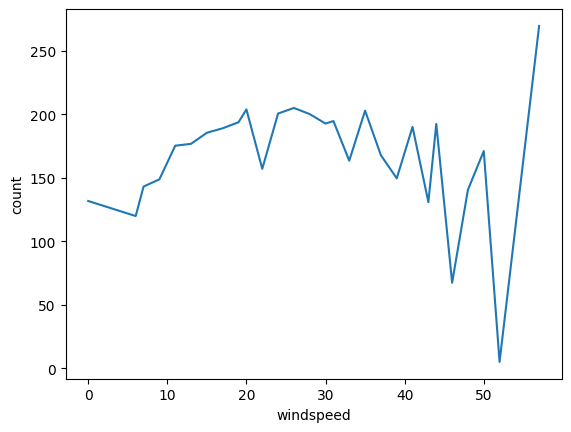

In [12]:
df_sorted=df.groupby("windspeed")["count"].apply(trim).reset_index()
plt.plot(df_sorted["windspeed"],df_sorted["count"])
plt.xlabel("windspeed")
plt.ylabel("count")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  object 
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  Month       10886 non-null  int32  
 12  Year        10886 non-null  int32  
dtypes: float64(3), int32(2), int64(7), object(1)
memory usage: 1020.7+ KB


In [14]:
for category in category_columns:
    
    for col in columns:
        
        if (col in category_columns):
            continue

        observed_counts=df.groupby(category)[col].apply(trim)
        summ=observed_counts.sum()
        lo=len(observed_counts)
        expected_counts=pd.Series([summ/lo for _ in range(lo)])
        
        chi2_statistic, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)
        if p_value<0.05:
            print(category,col)

Month temp
Month atemp
Month casual
Month registered
Month count
Year registered
Year count
weather casual
weather registered
weather count
workingday casual
season temp
season casual
season registered
season count


<Axes: xlabel='weather', ylabel='average count'>

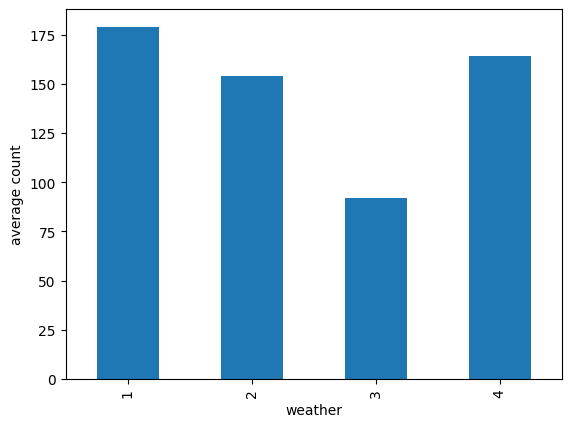

In [15]:
df.groupby("weather")["count"].apply(trim).plot(kind="bar",ylabel="average count")


<Axes: xlabel='weather', ylabel='average casual'>

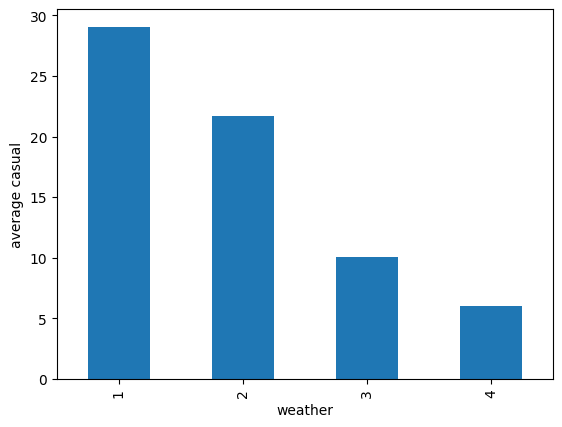

In [16]:
df.groupby("weather")["casual"].apply(trim).plot(kind="bar",ylabel="average casual")


<Axes: xlabel='weather', ylabel='average registered'>

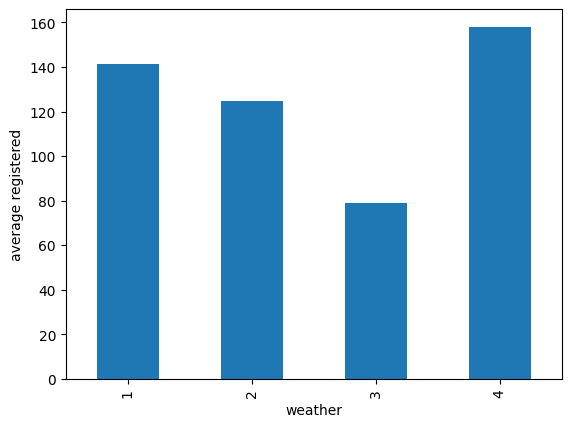

In [17]:
df.groupby("weather")["registered"].apply(trim).plot(kind="bar",ylabel="average registered")

<Axes: xlabel='weather', ylabel='average workingday'>

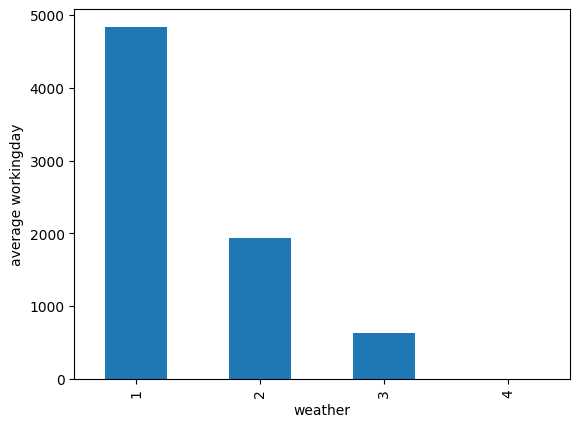

In [18]:
df.groupby("weather")["workingday"].sum().plot(kind="bar",ylabel="average workingday")

<Axes: xlabel='Month', ylabel='average count'>

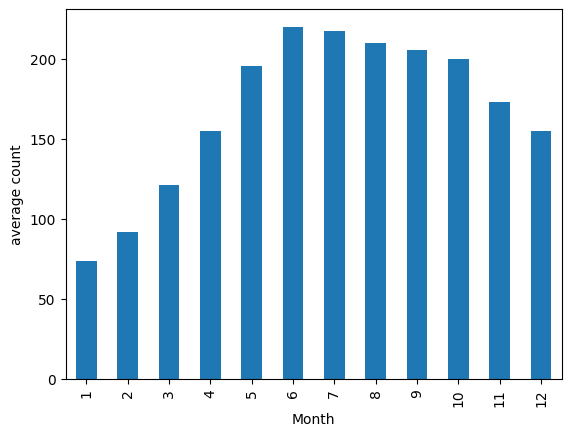

In [19]:
df.groupby("Month")["count"].apply(trim).plot(kind="bar",ylabel="average count")

<Axes: xlabel='Month', ylabel='average casual'>

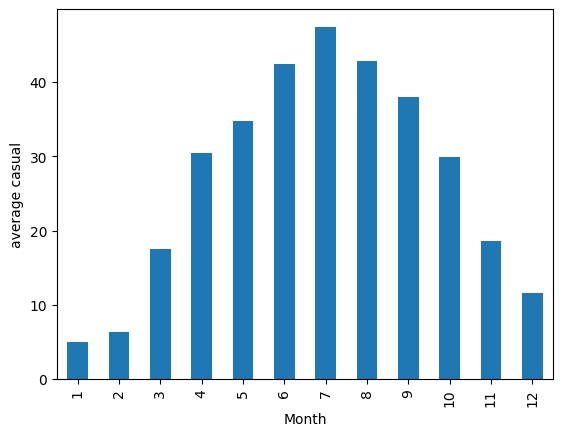

In [20]:
df.groupby("Month")["casual"].apply(trim).plot(kind="bar",ylabel="average casual")

<Axes: xlabel='Month', ylabel='average registered'>

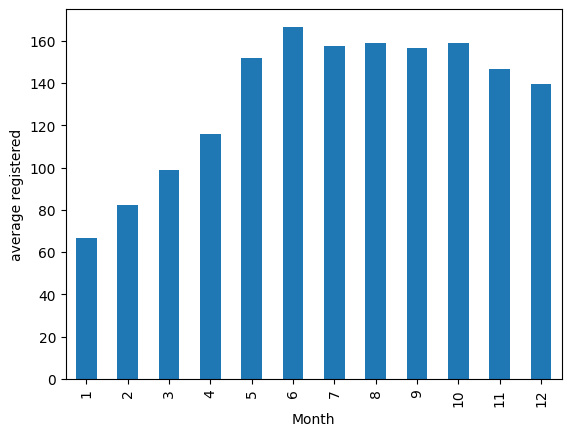

In [21]:
df.groupby("Month")["registered"].apply(trim).plot(kind="bar",ylabel="average registered")

<Axes: xlabel='workingday', ylabel='average casual'>

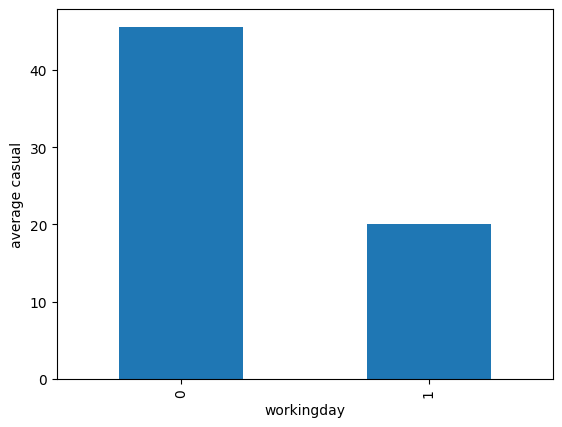

In [22]:
df.groupby("workingday")["casual"].apply(trim).plot(kind="bar",ylabel="average casual")

<Axes: xlabel='workingday', ylabel='average registered'>

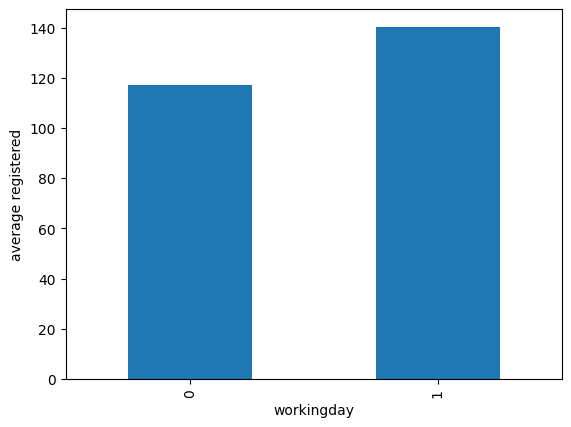

In [23]:
df.groupby("workingday")["registered"].apply(trim).plot(kind="bar",ylabel="average registered")

<Axes: xlabel='season', ylabel='average count'>

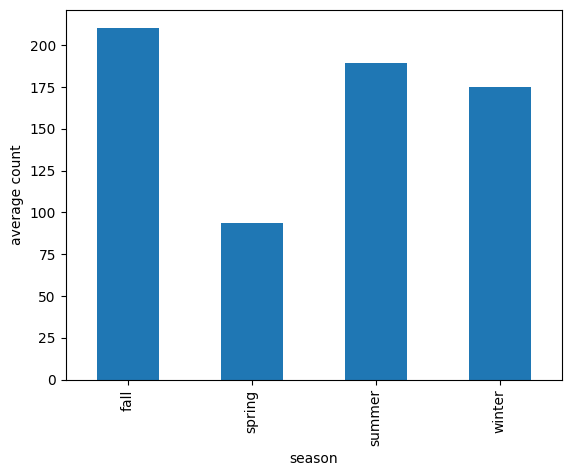

In [24]:
df.groupby("season")["count"].apply(trim).plot(kind="bar",ylabel="average count")

In [25]:

(df[["temp","atemp","humidity","windspeed","casual","registered","count"]]).skew()
#The above line of code tells the skewness measure of each column

temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
dtype: float64

In [26]:
"""
df["atemp"]=df["atemp"]**2
df["windspeed"]=df["windspeed"]**0.5
df["casual"]=df["casual"]**0.5
df["registered"]=df["registered"]**0.5
df["count"]=df["count"]**0.5


(df[["temp","atemp","humidity","windspeed","casual","registered","count"]]).skew()
"""

'\ndf["atemp"]=df["atemp"]**2\ndf["windspeed"]=df["windspeed"]**0.5\ndf["casual"]=df["casual"]**0.5\ndf["registered"]=df["registered"]**0.5\ndf["count"]=df["count"]**0.5\n\n\n(df[["temp","atemp","humidity","windspeed","casual","registered","count"]]).skew()\n'

In [27]:
df=pd.get_dummies(df,columns=["season","weather","Month","Year"],drop_first=True)
scaler=StandardScaler()
df1=df.copy()

df1[["temp","atemp","humidity","windspeed","casual","registered","count"]]=scaler.fit_transform(df1[["temp","atemp","humidity","windspeed","casual","registered","count"]])


74218.79589814258
63785.14146905535
58634.9386718138
54460.433199846964
50905.16182229533
48789.208162915114
46089.82949236885
44743.74443134894


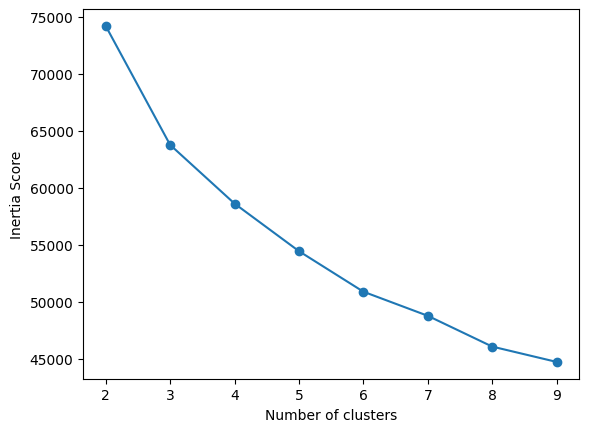

In [28]:
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1)
    print(kmeans.inertia_)
    scores.append(kmeans.inertia_)

plt.plot(range(2, 10), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')

plt.show()

In [29]:
Inertia gives a sense of how well a point fits inside a cluster, lower the inertia the more well it fits

SyntaxError: invalid syntax (3464633156.py, line 1)

In [ ]:
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1)
    print(silhouette_score(df1, kmeans.labels_))
    scores.append(silhouette_score(df1, kmeans.labels_))

plt.plot(range(2, 10), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette')
plt.show()

In [ ]:





print(df1.info())

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df1)

df1['pca1'] = pca_result[:, 0]
df1['pca2'] = pca_result[:, 1]
kmeans
#sns.scatterplot(data=df1, x='pca1', y='pca2',hue="cluster", palette='tab10')

In [ ]:

df2=df1[["pca1","pca2"]].copy()


In [ ]:
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df2)
    print(silhouette_score(df2, kmeans.labels_))
    scores.append(silhouette_score(df2,kmeans.labels_))

plt.plot(range(2, 10), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette')
plt.show()

In [ ]:
Silhoette score tells how well data points inside each clusters and how well differentiated a point is from otheer clusters
The sharpest drop tells us the efficient number of clusters to be used , silhouette score and efficiency of the clusters are directly proportional

In [ ]:
kmeans=KMeans(n_clusters=2,random_state=42)

labels=kmeans.fit_predict(df1)
#xtrain=scaler.inverse_transform(xtrain)
#print(xtrain)


df1['cluster'] = kmeans.labels_

In [ ]:


#sns.scatterplot(data=df1, x='pca1', y='pca2',hue="cluster", palette='tab10')

In [ ]:
sns.scatterplot(data=df1, x='pca1', y='pca2',hue="cluster", palette='tab10')